In [ ]:
import pandas as pd
from google.colab import files
files=files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

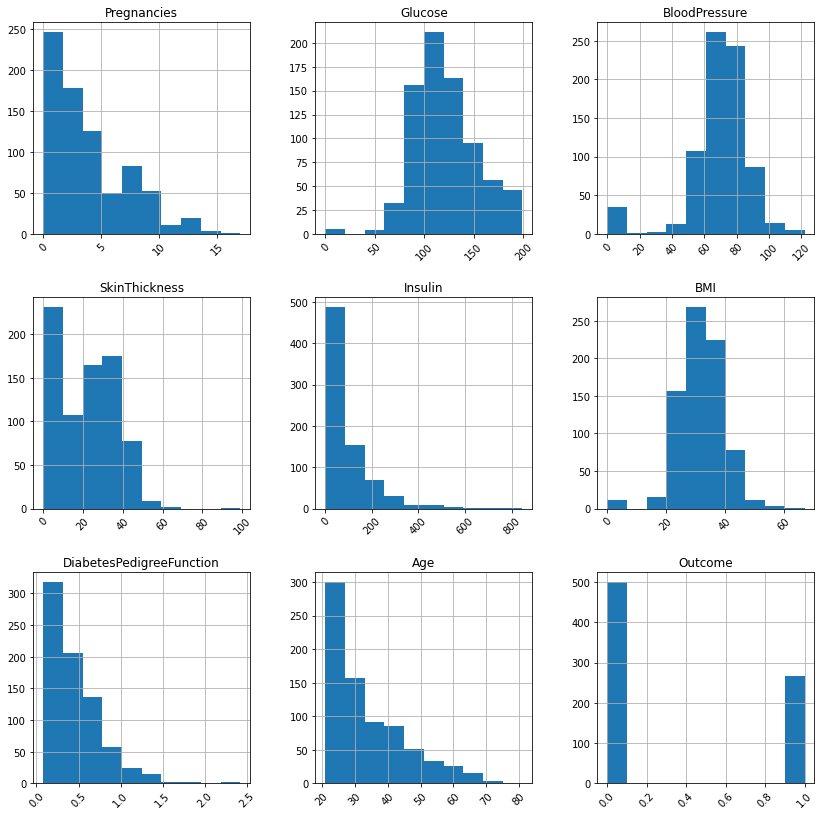

In [ ]:
data.hist(figsize=(14,14), xrot=45)
plt.show()

In [ ]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

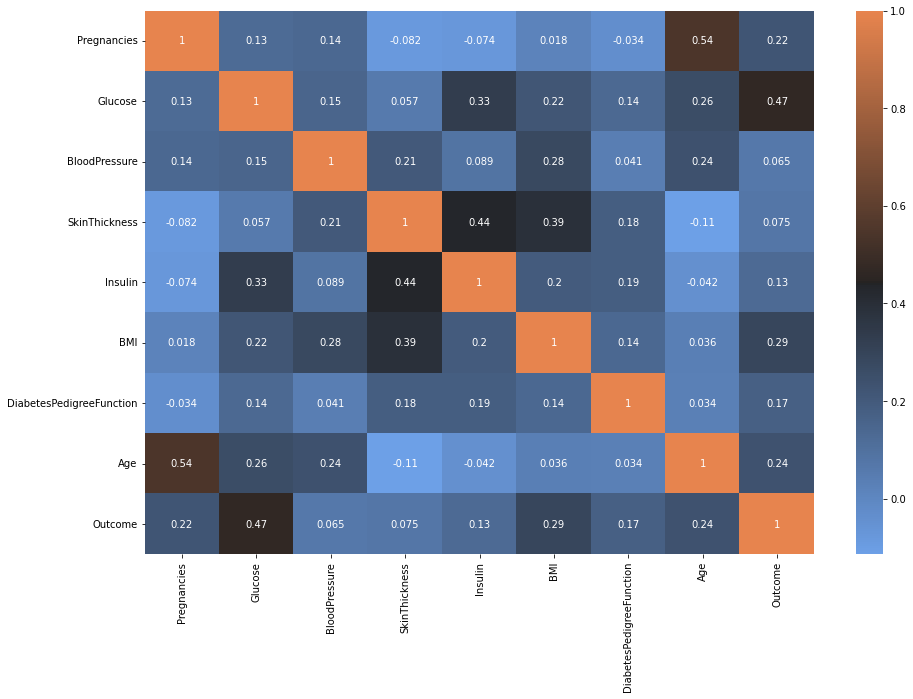

In [ ]:
import seaborn as sns
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,
            annot = True, cmap=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True))

In [ ]:
X=data[['Glucose','BMI','Pregnancies']]
y=data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
clf_list=[('decision tree', DecisionTreeClassifier()),
          ('logistic regresion', LogisticRegression()),
          ('knn', KNeighborsClassifier()),
          ('naive bayes classifier', GaussianNB())]

In [ ]:
for model_tuple in clf_list:
  model = model_tuple[1]
  if 'random state' in model.get_params().keys():
    model.set_params(random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc = accuracy_score(y_pred, y_test)
  print(f"{model_tuple[0]}'s accruracy: {acc:.2f}")

decision tree's accruracy: 0.74
logistic regresion's accruracy: 0.79
knn's accruracy: 0.78
naive bayes classifier's accruracy: 0.76


In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)

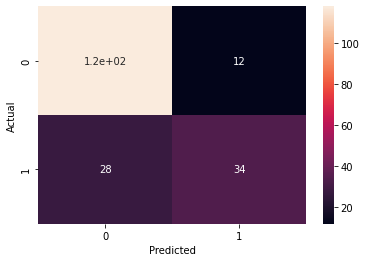

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix,annot=True)
#tp, fp
#fn, tn

In [ ]:
print ('akurasi: ', metrics.accuracy_score(y_test,y_pred))
plt.show()

akurasi:  0.7916666666666666


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       130
           1       0.74      0.55      0.63        62

    accuracy                           0.79       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.79      0.79      0.78       192



In [ ]:
print (X_test)
print (y_pred)

     Glucose   BMI  Pregnancies
661      199  42.9            1
122      107  33.6            2
113       76  34.0            4
14       166  25.8            5
529      111  24.6            0
..       ...   ...          ...
366      124  27.6            6
301      144  31.6            2
382      109  25.4            1
140      128  21.1            3
463       88  27.6            5

[192 rows x 3 columns]
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0]


In [ ]:
from numpy import mean 
from numpy import std 
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
X,y= make_classification (n_samples=768, n_features=3, n_informative=1, n_redundant=1, random_state=1,n_clusters_per_class=1)
cv = KFold(n_splits=4, random_state=1,shuffle=True)

In [ ]:
model = LogisticRegression()
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)

[0.85416667 0.90625    0.86979167 0.86458333]


In [ ]:
akurasi= 'accuracy:%.3f (%.3f)' %(mean(scores),std(scores))
print(akurasi)

accuracy:0.874 (0.020)


In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(clf_list, voting='hard')
voting_clf.fit(X_train,y_train)
y_pred=voting_clf.predict(X_test)
print(f"voting classifier's accuracy HARD:{accuracy_score(y_pred, y_test):.2f}")

voting classifier's accuracy HARD:0.79


In [ ]:
voting_clf = VotingClassifier(clf_list, voting='soft')
voting_clf.fit(X_train,y_train)
y_pred=voting_clf.predict(X_test)
print(f"voting classifier's accuracy SOFT:{accuracy_score(y_pred, y_test):.2f}")

voting classifier's accuracy SOFT:0.79
